ENSI : Restauration d'images et considérations numériques  - 2024
Pr Slim MHIRI

# Atelier 1 : Méthodes variationnelles pour l'imagerie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, fft2
import cv2


## 1. Téléchargements des images



## 2. Gestion des images
Dans ce TP nous allons (entre autres) travailler avec l'image de Lena
<img src="lena.png" alt="Lena" width="128" height="128"/>

### Chargement d'une image

In [ ]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndim
#on charge l'image de lena à l'aide de la fonction imread de la bibliothèque ndimage de scipy
y =plt.imread("/content/lena.png")

#on ne garde que la première composante car niveau de gris
y=y[:,:,0];
#l'image est de type int, on la cast en float pour pouvoir faire des calculs
y=y.astype(float)
#la taille de l'image peut s'obtenir à l'aide de l'attribut shape
[n1,n2]=y.shape


### Affichage d'une image

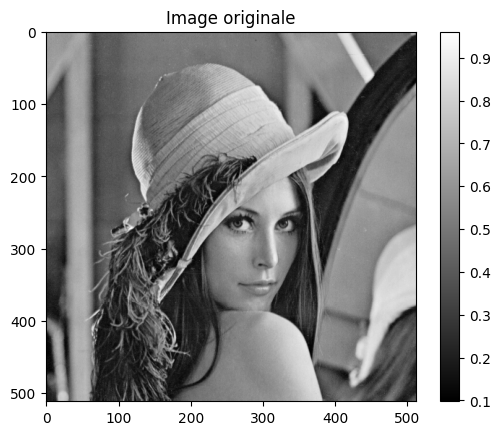

In [ ]:
import matplotlib.pyplot as plt
#on affiche l'image à l'aide de la fonction imshow de la bibliothèque pyplot de matplotlib
#on donne un numero à la figure
plt.figure(1)
#on l'affiche en niveau de gris
plt.imshow(y, cmap="gray")
#on affiche la colorbar associée
plt.colorbar()
#on lui donne un titre
plt.title('Image originale')
#on affiche tout cela sur la figure 1
plt.show()

## 3. Problème direct
On s'intéresse premièrement au problème direct, c'est à dire, comment générer des observations $z$ à partir de données originales $y$.
On rappelle que le problème d'observation s'écrit
\begin{equation}
z=\mathcal{D}_\alpha(Ly)
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $L$ : opérateur linéaire (un opérateur de convolution par exemple)</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit).</li>
</ul>

### 3.1. Le problème de convolution
On considère dans un premier temps que l'opérateur linéaire $L$ modélise une convolution.
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où $h$ est le noyau de convolution.

#### Rappels
On rappelle que le filtrage de l'image $g$ par le noyau $h$ est la suite $(w_{n_1,n_2})$ définie par
\begin{equation}
w_{n_1,n_2}=\sum\limits_{m_1=0}^{N_1-1}\sum\limits_{m_2=0}^{N_2-1}h_{m_1,m_2}g_{n_1-m_1,n_2-m_2}=(h\star g)_{n_1,n_2}
\end{equation}
où les indices $n_i-m_i$ sont définis modulo $N_i$ et où $g$ et $h$ sont de taille $N_1\times N_2$.

On note $\hat{h}=(\hat{h}_{k_1,k_2})$ et $\hat{g}=(\hat{g}_{k_1,k_2})$ les transformées de Fourier finies de $h=(h_{n_1,n_2})$ et $g=(g_{n_1,n_2})$.

Alors $w=(w_{n_1,n_2})$ est une suite finie et sa transformée de Fourier finie notée $\hat{w}=(\hat{w}_{k_1,k_2})$ vérifie

\begin{equation}
\hat{w}_{k_1,k_2}=\hat{h}_{k_1,k_2}\hat{g}_{k_1,k_2},\ \forall k_i=0,..,N_i-1.
\end{equation}

Avec Python, pour obtenir $\hat{w}$, il nous suffit donc de construire le vecteur dont chaque coordonnée est le produit des coordonnées correspondantes de $\hat{h}$ et $\hat{g}$.

### Noyaux de convolution
On considère ici deux types de noyau de convolution. Le noyau gaussien et le noyau uniforme. La construction de ces noyaux se fait grâce au deux fonctions fournies ci-après prenant chacune deux arguments : $n$ taille (en pixel) du noyau (i.e. le noyau obtenu sera de taille $n\times n$) et $s$ l'étalement du noyau.

In [ ]:
#pour cela nous avons besoin de la bibliothèque numpy
import numpy as np

In [ ]:
def gaussian(n,s):
    x = np.concatenate((np.arange(0,n/2,1),np.arange(-n/2,0,1)))
    [Y,X] = np.meshgrid(x,x)
    h = np.exp((-X**2-Y**2)/(2*s**2))
    h = h/np.sum(h)
    return h

In [ ]:
def uniform(n,s):
    h=np.zeros((n,n))
    h[0:int(np.ceil(s/2)),0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n,0:int(np.ceil(s/2))]=1
    h[0:int(np.ceil(s/2)),n-int(np.floor(s/2)):n]=1
    h[n-int(np.floor(s/2)):n,n-int(np.floor(s/2)):n]=1
    h = h/np.sum(h)
    return h

### Exercice 1 : génération de noyaux
Construire un noyau gaussien de la taille de l'image de Lena chargée en section 3 et d'étalement $s=1$.<br />
Construire un noyau uniforme de la taille de l'image de Lena chargée en section 3 et d'étalement $s=5$.<br /> Visualiser les filtres ainsi que les modules leur réponses fréquentielles. (Pour voir le filtre on zoomera sur les indices de 0 à 20 par exemple).<br>

Taille de l'image : 512


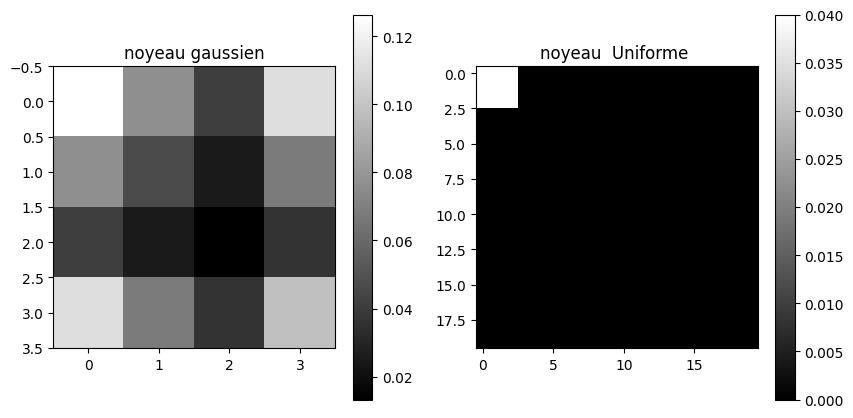

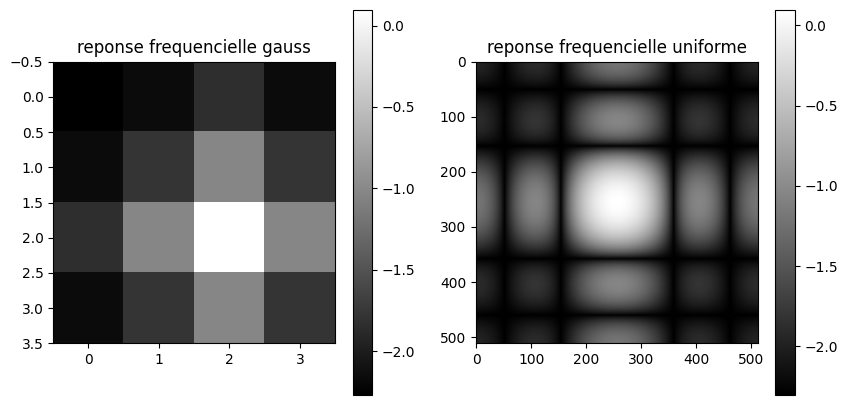

In [ ]:

n1 = y.shape[0]  #Recuperer la taille de l'image
print("Taille de l'image :",n1)

#créeation du filtre gussien

noyeau_gaussien = gaussian(n1,1)

#creeation du filtre uniforme
noyeau_uniforme = uniform(n1,5)




zoom_gaussian = noyeau_gaussien[:20, :20]
zoom_uniform = noyeau_uniforme[:20, :20]



plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(zoom_gaussian, cmap='gray')
plt.title('noyeau gaussien')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(zoom_uniform, cmap='gray')
plt.title('noyeau  Uniforme ')
plt.colorbar()

plt.show()




fourrier_gaussian = fftshift(np.abs(fft2(noyeau_gaussien)))
fourrier_uniform = fftshift(np.abs(fft2(noyeau_uniforme)))

# Plot frequency responses
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(fourrier_gaussian +0.1 ), cmap='gray')
plt.title('reponse frequencielle gauss')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.log(fourrier_uniform +0.1 ), cmap='gray')
plt.title('reponse frequencielle uniforme')
plt.colorbar()

plt.show()




### Exercice 2 : dégradation d'une image
Ecrire une fonction degrad_imag qui prend en entrée une image $y$, un noyau de convolution $h$, un paramètre $\alpha$ et un type de dégradation $\mathcal{D}$ et qui renvoie en sortie une image dégradée par un flou de noyau $h$ et une perturbation $\mathcal{D}_\alpha$ qui pourra être
<ol>
<li> un bruit additif gaussien de variance $\alpha=\sigma^2$; </li>
<li> un bruit Poissonien de paramètre d'échelle $\alpha>0$. </li>
<li> un bruit de mouvement . </li>
<li> un bruit focus. </li>
</ol>

```
# This is formatted as code
```



In [ ]:
def uniform(n, s):
    h = np.zeros((n, n))
    h[0:int(np.ceil(s/2)), 0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n, 0:int(np.ceil(s/2))] = 1
    h[0:int(np.ceil(s/2)), n-int(np.floor(s/2)):n] = 1
    h[n-int(np.floor(s/2)):n, n-int(np.floor(s/2)):n] = 1
    h = h / np.sum(h)
    return h



In [ ]:
def bouge(size):
    F = np.zeros((size, size))
    F[int((size + 1)/2) - 1, 0:size] = 1
    F = F / np.sum(F)
    return F



In [ ]:
def defocus(size):
    F = np.zeros((size, size))
    X = [(i + 1) - int((size + 1) / 2) for i in range(size)]
    rayoncar = (size - 1) * (size - 1) / 4
    for i in X:
        for j in X:
            F[(i + int((1 + size) / 2)) - 1, (j + int((1 + size) / 2)) - 1] = int(((i*i + j*j) <= rayoncar))
    F = F / np.sum(F)
    return F


In [ ]:
noyeau_focus = defocus(10)

print(noyeau_focus)



[[0.         0.         0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.         0.         0.        ]
 [0.         0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.         0.        ]
 [0.01449275 0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.01449275 0.        ]
 [0.01449275 0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.01449275 0.        ]
 [0.01449275 0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.01449275 0.        ]
 [0.01449275 0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.01449275 0.        ]
 [0.01449275 0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.01449275 0.        ]
 [0.         0.01449275 0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275 0.01449275 0.         0.        ]
 [0.         0.         0.01449275 0.01449275 0.01449275 0.01449275
  0.01449275

In [ ]:
import numpy as np
import cv2


#y : image
#h : noyeau
#alpha : param de flou
#D type de Bruit : "gaussian /poisson/ mouvement /focus "
def degrad_imag(y, h, alpha, D):
    print("va appliqué kernel",print(h[1][1]) , "de gauss sur l'image")

    # image dégradée par un flou de noyau  h
    image_flou = cv2.filter2D(y, -1, h)

    print("kernel de gauss appliqué sur l'image ")

    if (D ==  None) :
        image_flou = np.clip(image_flou, 0, 255)
        return image_flou
    #les perturbations
    if D == 'gaussian':
        print("va ajouter bruit ")

        bruit = np.random.normal(0, alpha, y.shape)
        print("bruit crée ")

        image_dégradée = image_flou + bruit
        print("bruit appliqué ")


    elif D == 'poisson':
        print("va ajouter bruit ")

        bruit_poissonien = np.random.poisson(y / alpha) * alpha
        image_dégradée = y + bruit_poissonien

    elif (D == 'mouvement'):
        print("va ajouter bruit ")

        noyeau_mouvement = bouge(alpha)
        image_dégradée = cv2.filter2D(y, -1, noyeau_mouvement)

    elif  (D == 'focus'):
        print("va ajouter bruit ")

        size = max(3, int(alpha))  # Ensure a minimum kernel size of 3.
        noyeau_focus = defocus(size)

        image_dégradée = cv2.filter2D(y, -1, noyeau_focus)


    image_dégradée = np.clip(image_dégradée, 0, 255)




    return image_dégradée




In [ ]:
print(noyeau_gaussien[1][1])

0.04646822695290549


In [ ]:
zg = degrad_imag(y, noyeau_gaussien, alpha=100, D='gaussian')


0.04646822695290549
va appliqué kernel None de gauss sur l'image
kernel de gauss appliqué sur l'image 
va ajouter bruit 
bruit crée 
bruit appliqué 


### Exercice 3 : génération d'images dégradées
Utiliser la fonction degrad_imag définie précédemment et générer
<ul>
<li>une image $zb$ telle que $zb$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et sans bruit.</li>
<li>une image $zg$ telle que $zg$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et le bruit est un bruit additif gaussien de variance $100$.</li>
<li>une image $zf$ telle que $zf$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau blur floue de mouvement .</li>
<li>une image $zz$ telle que $zz$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau focus .</li>
</ul>
</br>
Afficher les images dégradées ainsi générées.

In [ ]:


identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=np.float32)   #idendité de convolution
zg = degrad_imag(y, noyeau_gaussien, alpha=100, D='gaussian')

zb = degrad_imag(y,noyeau_gaussien,1,None)



# Apply Gaussian blur with additive Gaussian noise (variance = 100)

# Apply motion blur (using uniform kernel as a motion blur approximation)
zf = degrad_imag(y, identity_kernel, alpha=20, D='mouvement')

# Apply focus blur (using a large Gaussian kernel)
zz = degrad_imag(y, identity_kernel, alpha=20, D='focus')






0.04646822695290549
va appliqué kernel None de gauss sur l'image
kernel de gauss appliqué sur l'image 
va ajouter bruit 
bruit crée 
bruit appliqué 
0.04646822695290549
va appliqué kernel None de gauss sur l'image
kernel de gauss appliqué sur l'image 
1.0
va appliqué kernel None de gauss sur l'image
kernel de gauss appliqué sur l'image 
va ajouter bruit 
1.0
va appliqué kernel None de gauss sur l'image
kernel de gauss appliqué sur l'image 
va ajouter bruit 


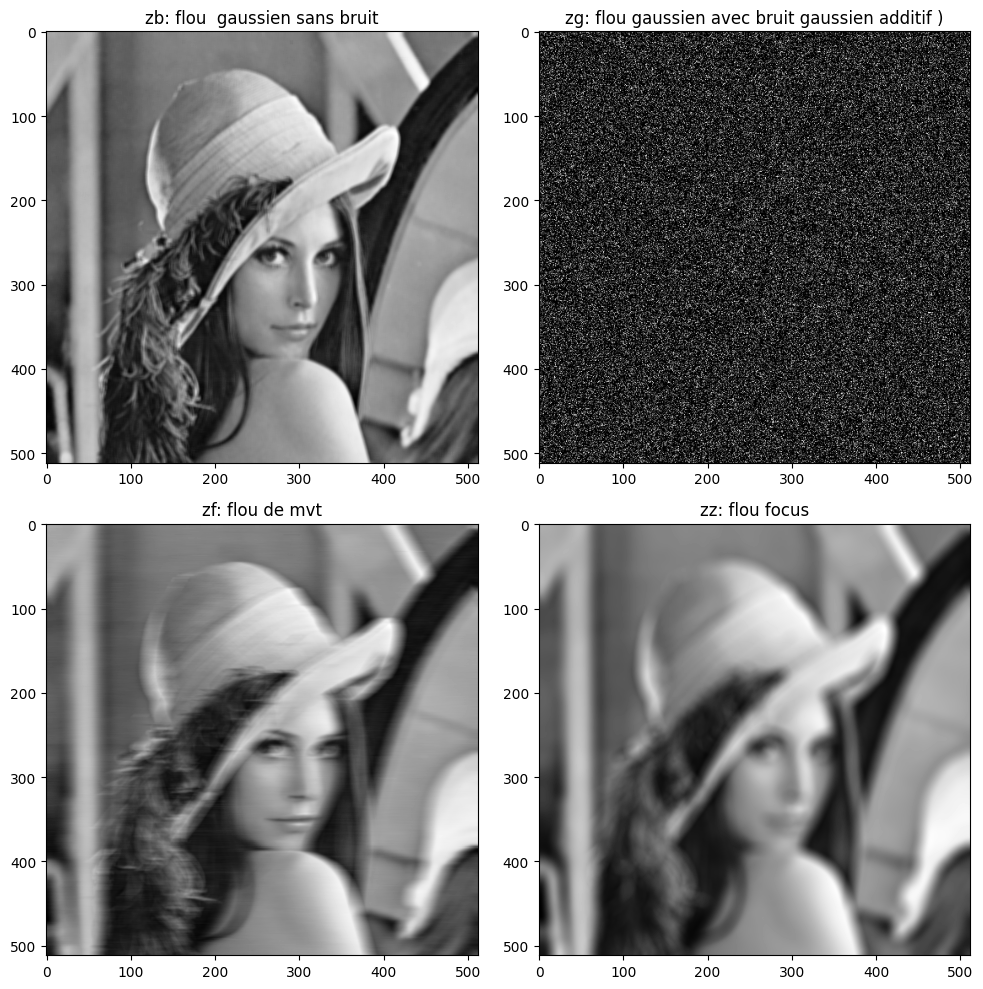

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(zb, cmap='gray')
plt.title('zb: flou  gaussien sans bruit')

plt.subplot(2, 2, 2)
plt.imshow(zg, cmap='gray')
plt.title('zg: flou gaussien avec bruit gaussien additif )')

plt.subplot(2, 2, 3)
plt.imshow(zf, cmap='gray')
plt.title('zf: flou de mvt')

plt.subplot(2, 2, 4)
plt.imshow(zz, cmap='gray')
plt.title('zz: flou focus')

plt.tight_layout()
plt.show()



### 3.2 Mesures de qualité
Pour comparer les performances des algorithmes de restauration on utilisera le SNR (Signal to noise ratio). Si $\tilde{y}$ est le signal restauré et $y$ le signal original non bruité

\begin{equation}
SNR(y,\tilde{y})=10\log_{10}\left(\frac{\parallel y\parallel_2^2}{\parallel y-\tilde{y}\parallel_2^2}\right) \qquad \text{où} \quad \parallel y\parallel_2^2=\sum\limits_{n_1=0}^{N-1}\sum\limits_{n_2=0}^{N-1} |y_{n_1,n_2}|^2.
\end{equation}

On utilisera aussi le PSNR (Peak Signal to noise ratio).

\begin{equation}
PSNR(y,\tilde{y})=10\log_{10}\left(\frac{255^2}{\parallel y-\tilde{y}\parallel_2^2}\right)
\end{equation}

### Exercice 4 : mesures de qualité

1 Fonction SNR :
Ecrire une fonction SNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le SNR entre ces deux images.

2 Fonction PSNR :
Ecrire une fonction PSNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le PSNR entre ces deux images.

In [ ]:
def snr(x,xref):
    s = 10*np.log10(np.mean(xref**2)/np.mean((xref-x)**2))
    return s

def psnr(x,xref):
    s = 10*np.log10(255**2/np.mean((xref-x)**2))
    return s

Remarque : Dans le cas où le SNR (ou le PSNR) est calculé entre l'image originale et l'image bruitée ($\tilde{y}$ correspond donc à l'image dégradée $z$ ici), on parle de SNR (ou PSNR) initial.

### Exercice 5 : calculs du SNR et PSNR initiaux
Calculer le SNR et le PSNR initiaux entre l'image originale de Lena et ses versions dégradées $zb$ et $zg$ obtenues à l'exercice 2. Vérifier que l'on obtient environ $SNR(y,zb)=27.11$ dB et $PSNR(y,zb)=32.77$ dB pour $zb$ et  $SNR(y,zg)=21.18$ dB et $PSNR(y,zg)=26.84$ dB pour $zg$.
Calculer le SNR et le PSNR pour $zf$ et pour $zz$

In [ ]:



# 2. Calculate SNR and PSNR for each degraded image
# SNR and PSNR for zb
snr_zb = snr(y, zb)
psnr_zb = psnr(y, zb)

# SNR and PSNR for zg
snr_zg = snr(y, zg)
psnr_zg = psnr(y, zg)

# SNR and PSNR for zf
snr_zf = snr(y, zf)
psnr_zf = psnr(y, zf)

# SNR and PSNR for zz
snr_zz = snr(y, zz)
psnr_zz = psnr(y, zz)

# 3. Print the results
print(f"SNR(y, zb) = {snr_zb:.2f} dB, PSNR(y, zb) = {psnr_zb:.2f} dB")
print(f"SNR(y, zg) = {snr_zg:.2f} dB, PSNR(y, zg) = {psnr_zg:.2f} dB")
print(f"SNR(y, zf) = {snr_zf:.2f} dB, PSNR(y, zf) = {psnr_zf:.2f} dB")
print(f"SNR(y, zz) = {snr_zz:.2f} dB, PSNR(y, zz) = {psnr_zz:.2f} dB")


SNR(y, zb) = 22.60 dB, PSNR(y, zb) = 76.43 dB
SNR(y, zg) = 0.03 dB, PSNR(y, zg) = 11.21 dB
SNR(y, zf) = 17.16 dB, PSNR(y, zf) = 71.09 dB
SNR(y, zz) = 17.26 dB, PSNR(y, zz) = 71.19 dB


## 4. Méthodes de base pour la déconvolution
On est donc dans le cas particulier où
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit)</li>
</ul>

### 4.1. Méthode d'inversion

On se propose ici d'implémenter la méthode d'inversion. Cette méthode est très simple et consiste à appliquer le filtre inverse aux observations. Cela équivaut, dans le domaine de Fourier, à diviser terme à terme l'observation par la réponse fréquentielle du filtre de dégradation.

### Exercice 6 : inversion directe

1. Fonction inversion :
Créez une fonction inversion_flou qui prend en entrée l'image observée $z$, la réponse impulsionnelle d'un filtre $h$ et donne en sortie l'image estimée en faisant l'inversion directe en Fourier comme expliqué ci-dessus.

2. Application :
Appliquer cette fonction aux observations $zg$ et $zb$ de l'exercice 3. Afficher les images et calculer les performances numériques c'est-à-dire le SNR et le PSNR.

In [ ]:
import numpy as np
import cv2

def inversion_flou(z, h):

    Z = np.fft.fft2(z)
    H = np.fft.fft2(h, s=z.shape)

    epsilon = 1e-6  #eviter div par 0 pour les freq nuls
    H = H + epsilon

    Y_est = Z / H

    y_est = np.fft.ifft2(Y_est)
    y_est = np.real(y_est)

    y_est = np.clip(y_est, 0, 255).astype(np.uint8)

    return y_est


In [ ]:

restored_zg = inversion_flou(zg, noyeau_gaussien)
restored_zb = inversion_flou(zb, noyeau_gaussien)

snr_zg_restored = snr(y, restored_zg)
psnr_zg_restored = psnr(y, restored_zg)
snr_zb_restored = snr(y, restored_zb)
psnr_zb_restored = psnr(y, restored_zb)

print(f"SNR(y, y_est_zg): {snr_zg_restored:.2f} dB, PSNR(y, y_est_zg): {psnr_zg_restored:.2f} dB")
print(f"SNR(y, y_est_zb): {snr_zb_restored:.2f} dB, PSNR(y, y_est_zb): {psnr_zb_restored:.2f} dB")


SNR(y, y_est_zg): -34.76 dB, PSNR(y, y_est_zg): 3.44 dB
SNR(y, y_est_zb): -20.97 dB, PSNR(y, y_est_zb): 53.81 dB


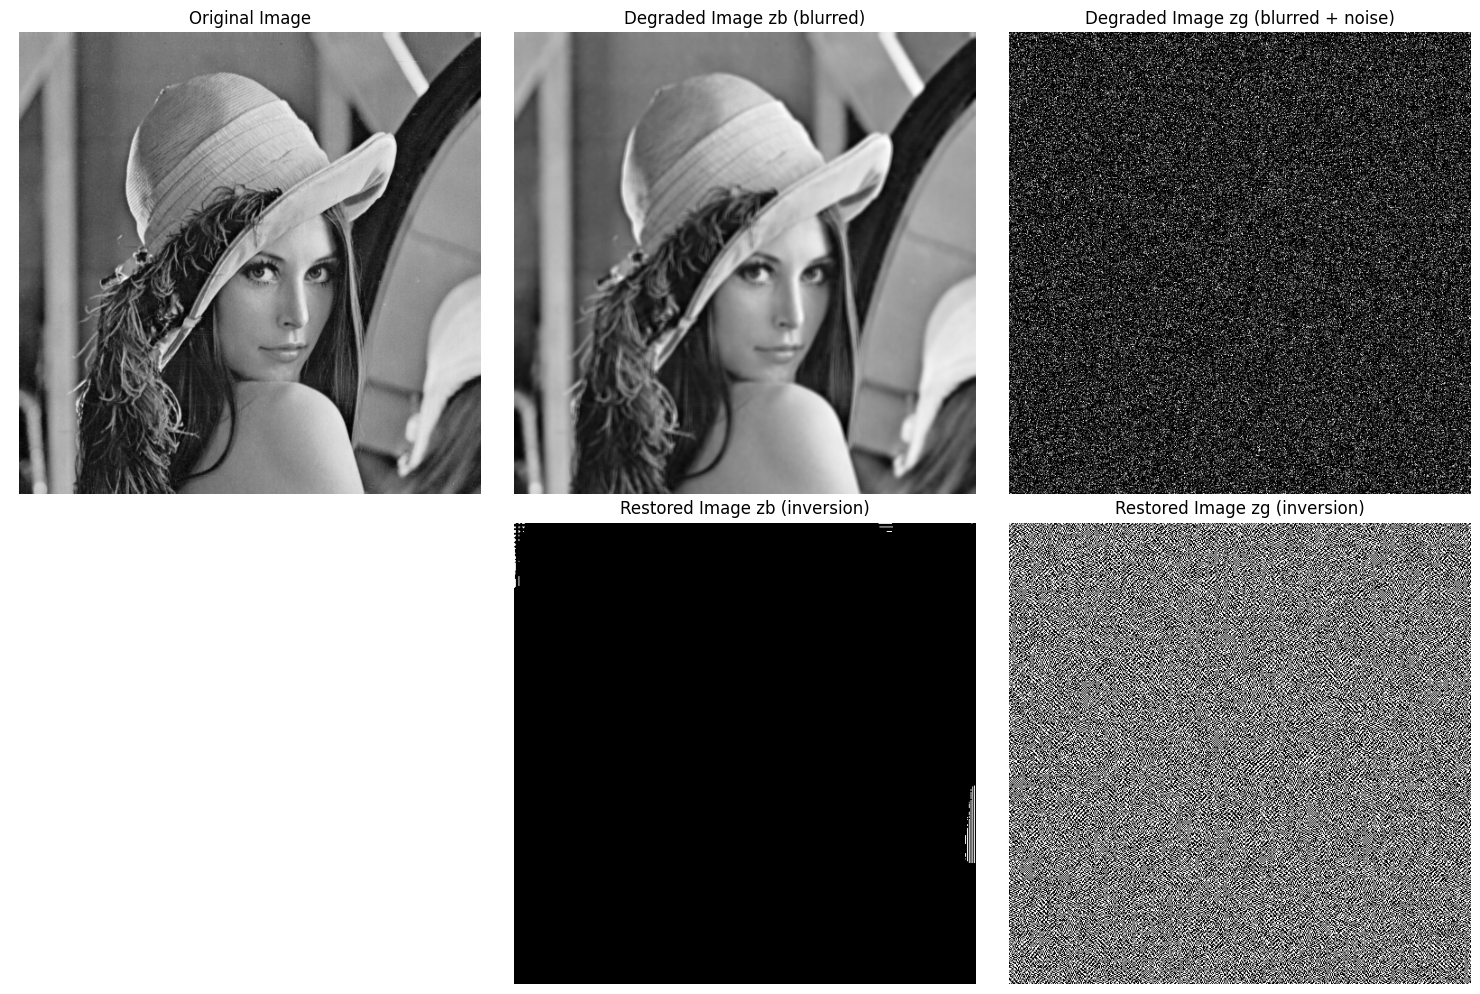

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(y, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Degraded images
axs[0, 1].imshow(zb, cmap='gray')
axs[0, 1].set_title('Degraded Image zb (blurred)')
axs[0, 1].axis('off')

axs[0, 2].imshow(zg, cmap='gray')
axs[0, 2].set_title('Degraded Image zg (blurred + noise)')
axs[0, 2].axis('off')

axs[1, 1].imshow(restored_zb, cmap='gray')
axs[1, 1].set_title('Restored Image zb (inversion)')
axs[1, 1].axis('off')

axs[1, 2].imshow(restored_zg, cmap='gray')
axs[1, 2].set_title('Restored Image zg (inversion)')
axs[1, 2].axis('off')

axs[1, 0].axis('off')

plt.tight_layout()
plt.show()


### 4.2. Filtre de Wiener dans le cas d'un bruit additif Gaussien
On suppose donc à présent que $\mathcal{D}_\alpha$ modélise un bruit additif gaussien de variance $\alpha=\sigma^2$.
On se restreint donc au cas où
\begin{equation}
z=(h\star y) + b
\end{equation}
avec
<ul>
<li> $z$ : observations </li>
<li> $y$ : données originales </li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $b$ : bruit additif Gaussien de variance $\sigma^2$</li>
</ul>

#### Filtre de Wiener pour la déconvolution
<em>
La formule qui donne le filtre de restauration de Wiener dans le cas de la déconvolution est
$$\hat{g}(\omega)=\frac{\overline{\hat{h}(\omega)}\mathcal{S}_x(\omega)}{|\hat{h}(\omega)|^2\mathcal{S}_x(\omega)+\sigma^2} $$
où $\hat{h}$ est la fonction de transfert du filtre de dégradation et $\mathcal{S}_x$ est la densité spectrale du processus aléatoire $x$ dont l'image de départ $y$ est une réalisation.


Remarque: ici on considère que l'image de départ $y$ est une réalisation d'un processus aléatoire $x$ sous jacent. Pour obtenir $\mathcal{S}_x$ on utilise la méthode du périodogramme sur une seule réalisation.

### Exercice 7 : Filtre de Wiener en déconvolution

1. Fonction filtre de Wiener:
Créez une fonction filtredeconvwiener qui prend en entrée la réponse impulsionnelle d'un filtre $h$, une variance $\sigma^2$ et une densité spectrale $\mathcal{S}_x$, et ressort la fonction de transfert du filtre de Wiener pour la restauration.<br />
Nous avons une seule réalisation, donc on estime directement $\mathcal{S}_x=\frac{|\hat{y}|^2}{N_1N_2}$ avec $\hat{y}$ la transformée de Fourier finie de $y$ et $N_1 \times N_2$ sa taille.<br />

2. Filtre de Wiener application du filtre inverse à l'image floue:
Appliquer ce filtre aux observations floues $zb$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

3. Filtre de Wiener application du filtre inverse à l'image floue et bruitée:
Appliquer ce filtre aux observations floues et bruitées $zg$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

In [ ]:
def filtredeconvwiener(h, sigma2, y):
    # Transformée de Fourier de l'image originale
    Y_hat = np.fft.fft2(y)

    # Transformée de Fourier du noyau
    H_hat = np.fft.fft2(h, s=Y_hat.shape)

    # Utiliser la fonction pour estimer Sx
    S_x = estimer_densite_spectrale(y)

    # Filtre de Wiener
    H_hat_conj = np.conj(H_hat)  # Conjugé de H
    g_hat = (H_hat_conj * S_x) / (np.abs(H_hat) ** 2 * S_x + sigma2)

    return g_hat


In [ ]:
def estimer_densite_spectrale(y):
    Y = np.fft.fft2(y)
    Sx = np.abs(Y) ** 2 / (Y.shape[0] * Y.shape[1])  # Estimation de Sx
    return Sx


In [ ]:
def appliquer_filtre_wiener(z, h, sigma2):
    H_hat = np.fft.fft2(h, s=z.shape)
    G_hat = filtredeconvwiener(h, sigma2, z)

    # Appliquer le filtre de Wiener dans le domaine fréquentiel
    Z_hat = np.fft.fft2(z)
    Y_hat_restored = G_hat * Z_hat

    # Inverse FFT pour obtenir l'image restaurée
    y_restored = np.fft.ifft2(Y_hat_restored)

    return np.real(y_restored)


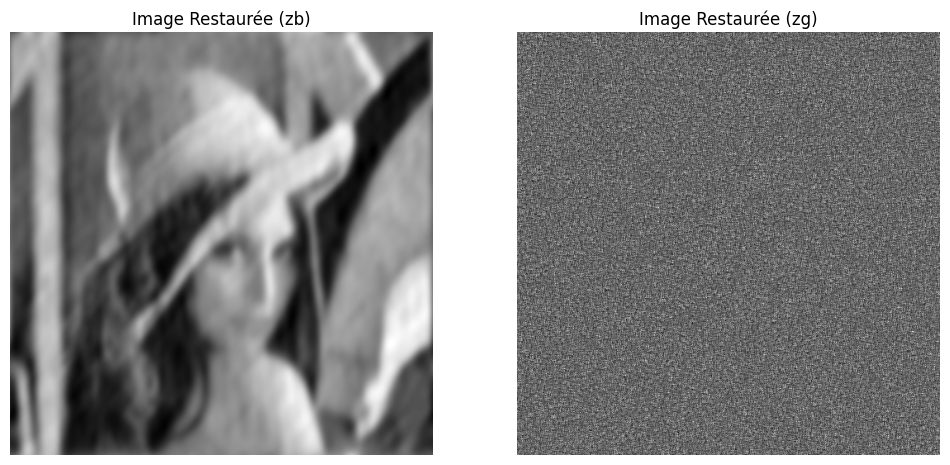

SNR(y, y_resto_zb): 17.50 dB, PSNR(y, y_resto_zb): 71.29 dB
SNR(y, y_resto_zg): -42.15 dB, PSNR(y, y_resto_zg): 11.64 dB


In [ ]:
# Supposons que vous ayez les variables suivantes définies :
# h = noyau utilisé pour le flou
# sigma2 = variance du bruit
# zb = image floue sans bruit
# zg = image floue avec bruit
# y = image originale

# Restaurer l'image floue
y_resto_zb = appliquer_filtre_wiener(zb, noyeau_gaussien, 1)

# Restaurer l'image floue et bruitée
y_resto_zg = appliquer_filtre_wiener(zg, noyeau_gaussien, 1000)

# Afficher les images (vous pouvez utiliser matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image Restaurée (zb)")
plt.imshow(y_resto_zb, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image Restaurée (zg)")
plt.imshow(y_resto_zg, cmap='gray')
plt.axis('off')

plt.show()

# Calculer le SNR et le PSNR pour les images restaurées
def snr(x, xref):
    s = 10 * np.log10(np.mean(xref**2) / np.mean((xref - x)**2))
    return s

def psnr(x, xref):
    s = 10 * np.log10(255**2 / np.mean((xref - x)**2))
    return s

snr_zb = snr(y_resto_zb, y)
psnr_zb = psnr(y_resto_zb, y)

snr_zg = snr(y_resto_zg, y)
psnr_zg = psnr(y_resto_zg, y)

print(f"SNR(y, y_resto_zb): {snr_zb:.2f} dB, PSNR(y, y_resto_zb): {psnr_zb:.2f} dB")
print(f"SNR(y, y_resto_zg): {snr_zg:.2f} dB, PSNR(y, y_resto_zg): {psnr_zg:.2f} dB")
